In [5]:
import mxnet as mx

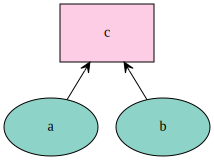

In [8]:
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = mx.sym.add_n(a,b,name="c")
mx.viz.plot_network(symbol=c)

In [7]:
mx.sym.Variable?